In [1]:
import numpy as np
import matplotlib.pyplot as plt

def monthly_payment(principal, annual_rate, years):
    r = annual_rate / 12
    n = years * 12
    return principal * r / (1 - (1 + r) ** -n)

def amortize(principal, monthly_rate, monthly_payment, months):
    balances = []
    for _ in range(months):
        interest = principal * monthly_rate
        principal_payment = monthly_payment - interest
        principal -= principal_payment
        balances.append(principal)
    return balances, principal


In [4]:

# Assumptions
loan_amount = 900_000
fixed_rate = 0.07
arm_initial_rate = 0.06
arm_max_rate = 0.12
rate_cap_per_year = 0.02
loan_term_years = 30
arm_fixed_years = 7
remaining_years = loan_term_years - arm_fixed_years

# Fixed mortgage
fixed_monthly = monthly_payment(loan_amount, fixed_rate, loan_term_years)

# ARM: First 7 years fixed
arm_monthly_initial = monthly_payment(loan_amount, arm_initial_rate, loan_term_years)
principal_remaining = loan_amount
r = arm_initial_rate / 12
n = loan_term_years * 12
balances, principal_remaining = amortize(principal_remaining, r, arm_monthly_initial, arm_fixed_years * 12)


30-Year Fixed Mortgage
  Monthly payment: $5987.72

7-Year ARM with 2% Annual Cap (Max 12%)
  Monthly payment (first 7 years): $5395.95
  Monthly payment (year 8, after first adjustment): $6401.21
  Peak monthly payment (if rates hit 12%): $8530.53


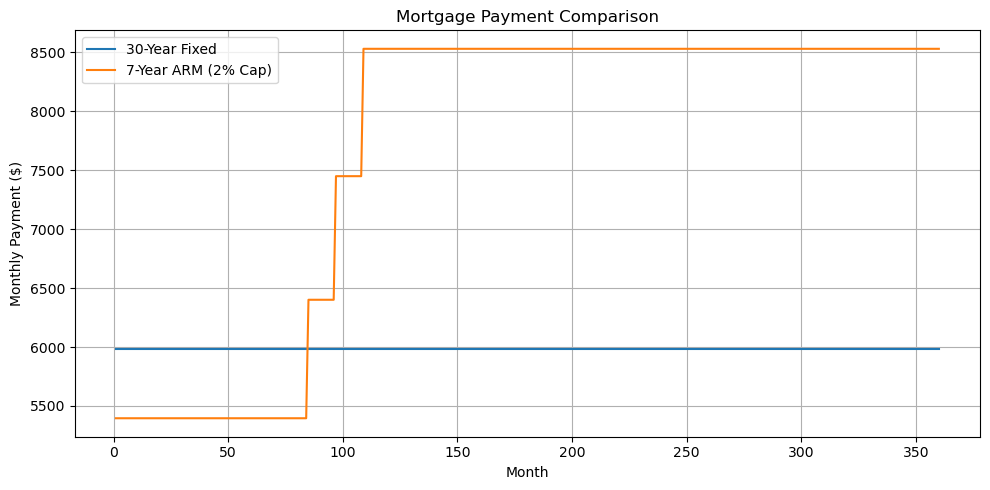

In [5]:

# ARM: After 7 years, simulate yearly capped increases
arm_payments = list([arm_monthly_initial] * (arm_fixed_years * 12))
arm_rate = arm_initial_rate
months_remaining = remaining_years * 12
month_counter = 0

while month_counter < months_remaining:
    # Cap rate increase
    arm_rate = min(arm_rate + rate_cap_per_year, arm_max_rate)
    months_this_rate = min(12, months_remaining - month_counter)
    years_this_rate = months_this_rate / 12
    monthly_rate = arm_rate / 12

    # Recalculate payment at new rate
    new_monthly = monthly_payment(principal_remaining, arm_rate, (months_remaining - month_counter) / 12)
    arm_payments += [new_monthly] * months_this_rate

    # Amortize principal under this rate
    new_balances, principal_remaining = amortize(principal_remaining, monthly_rate, new_monthly, months_this_rate)
    month_counter += months_this_rate

# Output results
print("30-Year Fixed Mortgage")
print(f"  Monthly payment: ${fixed_monthly:.2f}")

print("\n7-Year ARM with 2% Annual Cap (Max 12%)")
print(f"  Monthly payment (first 7 years): ${arm_monthly_initial:.2f}")
print(f"  Monthly payment (year 8, after first adjustment): ${arm_payments[84]:.2f}")
print(f"  Peak monthly payment (if rates hit 12%): ${max(arm_payments[84:]):.2f}")

# Plot
months = np.arange(1, 361)
fixed_payments = np.full_like(months, fixed_monthly)
arm_payments = np.array(arm_payments)

plt.figure(figsize=(10, 5))
plt.plot(months, fixed_payments, label='30-Year Fixed')
plt.plot(months, arm_payments, label='7-Year ARM (2% Cap)')
plt.xlabel('Month')
plt.ylabel('Monthly Payment ($)')
plt.title('Mortgage Payment Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
arm_payments.sum()

2769167.7360471534

In [9]:
fixed_monthly * 12 * 30

2155580.084380551

In [ ]:
arm_payments.sum()

30-Year Fixed Mortgage
  Monthly payment (before tax): $6116.02
  Avg after-tax monthly cost:   $5276.82

7-Year ARM with 2% Annual Cap (Max 12%)
  Initial monthly (before tax): $5577.96
  First adjusted payment (month 85): $3477.32
  Peak after-tax payment: $4585.32
  Avg after-tax monthly cost: $3840.48


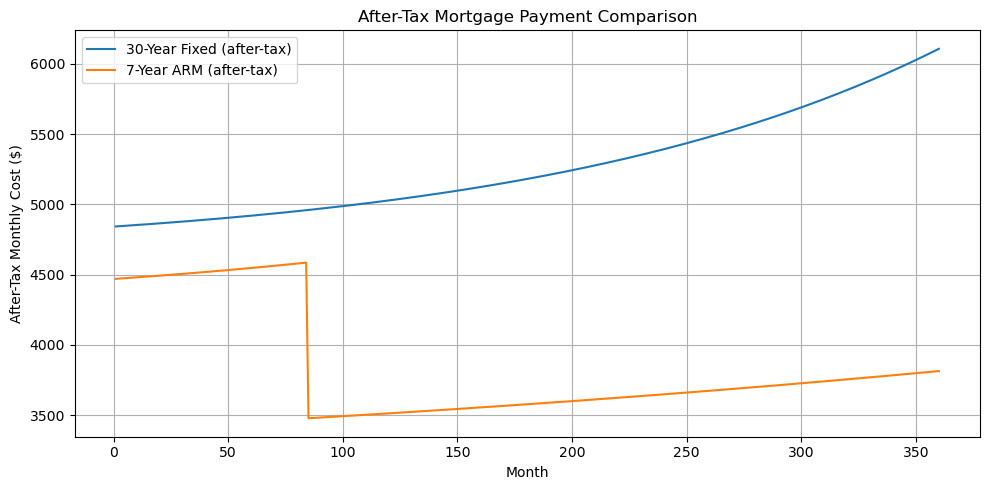

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def monthly_payment(principal, annual_rate, years):
    r = annual_rate / 12
    n = years * 12
    return principal * r / (1 - (1 + r) ** -n)

def amortize_with_tax(principal, monthly_rate, monthly_payment, months, tax_rate):
    payments = []
    for _ in range(months):
        interest = principal * monthly_rate
        principal_payment = monthly_payment - interest
        tax_savings = interest * tax_rate
        after_tax_payment = monthly_payment - tax_savings
        payments.append(after_tax_payment)
        principal -= principal_payment
    return payments, principal

# Assumptions
home = 1_178_700
loan_amount = .8 * home
fixed_rate = 0.0675
arm_initial_rate = 0.05875
arm_max_rate = 0.02
rate_cap_per_year = 0.02
loan_term_years = 30
arm_fixed_years = 7
remaining_years = loan_term_years - arm_fixed_years
marginal_tax_rate = 0.24

# Fixed mortgage
fixed_monthly = monthly_payment(loan_amount, fixed_rate, loan_term_years)
fixed_after_tax_payments, _ = amortize_with_tax(
    loan_amount, fixed_rate / 12, fixed_monthly, loan_term_years * 12, marginal_tax_rate
)

# ARM: First 7 years fixed
arm_monthly_initial = monthly_payment(loan_amount, arm_initial_rate, loan_term_years)
principal_remaining = loan_amount
r = arm_initial_rate / 12

arm_after_tax_payments, principal_remaining = amortize_with_tax(
    principal_remaining, r, arm_monthly_initial, arm_fixed_years * 12, marginal_tax_rate
)

# ARM: After 7 years with capped increases
arm_rate = arm_initial_rate
months_remaining = remaining_years * 12
month_counter = 0
arm_monthlies = []
arm_postax_monthlies = []
while month_counter < months_remaining:
    arm_rate = min(arm_rate + rate_cap_per_year, arm_max_rate)
    months_this_rate = min(12, months_remaining - month_counter)
    new_monthly = monthly_payment(principal_remaining, arm_rate, (months_remaining - month_counter) / 12)
    new_after_tax, principal_remaining = amortize_with_tax(
        principal_remaining, arm_rate / 12, new_monthly, months_this_rate, marginal_tax_rate
    )
    new_after_tax
    arm_monthlies.append(new_monthly)
    arm_after_tax_payments.extend(new_after_tax)
    month_counter += months_this_rate

# Output summary
print("30-Year Fixed Mortgage")
print(f"  Monthly payment (before tax): ${fixed_monthly:.2f}")
print(f"  Avg after-tax monthly cost:   ${np.mean(fixed_after_tax_payments):.2f}")

print("\n7-Year ARM with 2% Annual Cap (Max 12%)")
print(f"  Initial monthly (before tax): ${arm_monthly_initial:.2f}")
print(f"  First adjusted payment (month 85): ${arm_after_tax_payments[84]:.2f}")
print(f"  Peak after-tax payment: ${max(arm_after_tax_payments):.2f}")
print(f"  Avg after-tax monthly cost: ${np.mean(arm_after_tax_payments):.2f}")

# Plot
months = np.arange(1, 361)
plt.figure(figsize=(10, 5))
plt.plot(months, fixed_after_tax_payments, label='30-Year Fixed (after-tax)')
plt.plot(months, arm_after_tax_payments, label='7-Year ARM (after-tax)')
plt.xlabel('Month')
plt.ylabel('After-Tax Monthly Cost ($)')
plt.title('After-Tax Mortgage Payment Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
np.array(arm_after_tax_payments).sum()

1382571.3211994427

In [63]:
np.array(fixed_after_tax_payments).sum()

1899653.639278944

In [64]:
(np.array(arm_after_tax_payments).sum() - np.array(fixed_after_tax_payments).sum())

-517082.3180795014

In [60]:
(np.array(arm_after_tax_payments).sum() - np.array(fixed_after_tax_payments).sum()) / 30/ 12

1443.204095028218